In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

interim_folder = './interim_data/'
num_clusters = 6
num_features = 20

all_data = pd.read_pickle(interim_folder + 'all.pkl')
lb = MultiLabelBinarizer()
Y = lb.fit_transform(all_data.tags)
train_data, test_data, Y_train, Y_test = train_test_split(all_data["text"], Y, test_size=0.3, random_state=42)

gwbowv_name = "SDV_" + str(num_clusters) + "cluster_" + str(num_features) + "feature_matrix_gmm_sparse.npy"
gwbowv = np.load(interim_folder + gwbowv_name)

test_gwbowv_name = "TEST_SDV_" + str(num_clusters) + "cluster_" + str(num_features) + "feature_matrix_gmm_sparse.npy"
gwbowv_test = np.load(interim_folder + test_gwbowv_name)

In [2]:
print(all_data.shape)
print(train_data.shape)
print(test_data.shape)
print('growbowv', gwbowv.shape)
print('growbowv_test', gwbowv_test.shape)

(2786, 2)
(1950,)
(836,)
growbowv (1950, 120)
growbowv_test (836, 120)


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

similarities_calc_result = []
confidence = 0.99

for item_index, item in enumerate(gwbowv):
    # calculate cosine similarities
    similarities = cosine_similarity([item], gwbowv)

    # sort in ascending order
    similarities_indices =similarities.argsort()[0][-2:-12:-1]

    # cocine similarities Iteration
    for sim_index in similarities_indices:
        similarity = similarities[0][sim_index]

        # if similarity is higher than confidence, save it to result object
        if similarity > confidence and  similarity < 1:
        #if similarity == 1:
            similarities_calc_result.append([int(item_index), sim_index, similarity])

In [25]:
reset = train_data.reset_index(drop=True)

for doc in similarities_calc_result[20:22]:
    print('>>>similarity: ', doc[2], '\n', reset[doc[0]],"\nvs\n", reset[doc[1]], '\n')

>>>similarity:  0.9959348 
 BIG B INC  BIGB  4TH QTR JAN 31 NET  Shr 23 cts vs 17 cts Net 1,742,000 vs 1,1512,000 Sales 62.6 mln vs 53.6 mln Avg shrs 7,854,000 vs 6,617,000 Year Shr 61 cts vs 61 cts Net 4,469,000 vs 4,039,000 Sales 209.8 mln vs 175.4 mln Avg shrs 78,369,000 vs 6,610,000 Reuter  
vs
 HARPER INTERNATIONAL INC  HNT  3RD QTR NET  Qtr ended Jan 31 Shr 12 cts vs 19 cts Net 369,000 vs 358,000 Revs 7,076,000 vs 6,712,000 Avg shrs 3,050,000 vs 1,850,000 Nine mths Shr 53 cts vs 63 cts Net 1,523,000 vs 1,158,000 Revs 22.6 mln vs 20.7 mln Avg shrs 2,852,198 vs 1,850,000 Reuter  

>>>similarity:  0.995675 
 BIG B INC  BIGB  4TH QTR JAN 31 NET  Shr 23 cts vs 17 cts Net 1,742,000 vs 1,1512,000 Sales 62.6 mln vs 53.6 mln Avg shrs 7,854,000 vs 6,617,000 Year Shr 61 cts vs 61 cts Net 4,469,000 vs 4,039,000 Sales 209.8 mln vs 175.4 mln Avg shrs 78,369,000 vs 6,610,000 Reuter  
vs
 CML GROUP INC  CMLI  2ND QTR JAN 31 NET  Shr 72 cts vs 58 cts Net 4,791,000 vs 3,803,000 Sales 83.0 mln v

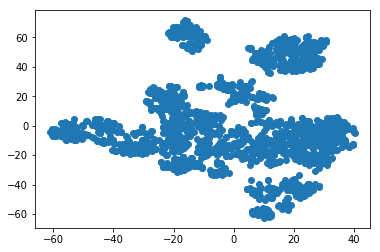

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# X_reduced = PCA(n_components=2).fit_transform(gwbowv)
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
# plt.show()

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(gwbowv)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()